# Settings

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import os
import ast

# Read history

In [53]:
path_to_aux = os.path.join('..', 'Pipeline', 'auxiliary_files')
path_to_history = os.path.join(path_to_aux, 'history', 'fullfit', 'FF_2')

post_train_history = os.path.join(path_to_history, 'posttrain.txt')
pre_train_history = os.path.join(path_to_history, 'pretrain.txt')

def parse_history(filename):
    with open(filename, 'r') as f:
        contents = f.read()
        history = ast.literal_eval(contents)
    return history

pre_history = parse_history(pre_train_history)
post_history = parse_history(post_train_history)

print(pre_history.keys())

dict_keys(['val_loss', 'val_crf_viterbi_accuracy', 'loss', 'crf_viterbi_accuracy', 'lr'])


# Plot directory

In [54]:
plot_path = os.path.join('Plots', 'fit_dynamics')

# Plot accuracy

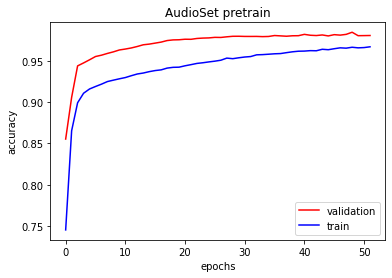

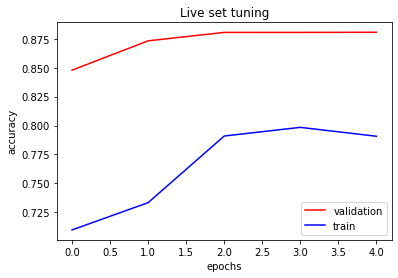

In [56]:
def plot_accuracy(history, acc_name, title, fname):
    val_loss = history['val_' + acc_name]
    loss = history[acc_name]
    vl_plot = plt.plot(val_loss, 'r', label='validation')
    tl_plot = plt.plot(loss, 'b', label='train')
    #plt.axis([0, 20, 0, 1])
    plt.legend(loc='lower right')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title(title)
    plt.savefig(fname + '.png')
    plt.show()    

plot_accuracy(pre_history, 'crf_viterbi_accuracy', 'AudioSet pretrain', os.path.join(plot_path, 'acc_audioset'))
plot_accuracy(post_history, 'crf_viterbi_accuracy', 'Live set tuning', os.path.join(plot_path, 'acc_liveset'))

# Plot losses

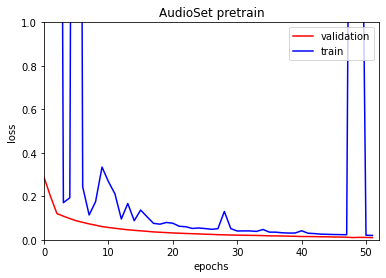

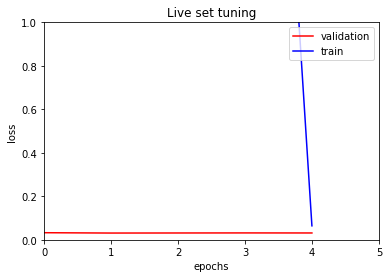

In [57]:
def plot_loss(history, title, fname):
    val_loss = history['val_loss']
    loss = history['loss']
    vl_plot = plt.plot(val_loss, 'r', label='validation')
    tl_plot = plt.plot(loss, 'b', label='train')
    plt.axis([0, len(loss), 0, 1])
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title(title)
    plt.savefig(fname + '.png')
    plt.show()

plot_loss(pre_history, 'AudioSet pretrain', os.path.join(plot_path, 'loss_audioset'))
plot_loss(post_history, 'Live set tuning', os.path.join(plot_path, 'loss_liveset'))

# Number of epochs

In [59]:
print('Pretrain epochs: ' + str(len(pre_history['loss'])))
print('Tune epochs: ' + str(len(post_history['loss'])))

Pretrain epochs: 52
Tune epochs: 5
